In [1]:
#get rid of annoying GPU warnings (and others)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.svm import SVC
import sklearn

In [5]:
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.models import Sequential, model_from_json  # Model type to be used
from keras.optimizers import Adam

# from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
# from keras.utils import np_utils                         # NumPy related tools
from pathlib import Path


In [6]:
def load_image_files(container_path, dimension=(128,128)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "Your own dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            if file.suffix.lower() not in ['.jpg', '.jpeg', '.png','.webp','.gif']:
                print(f"Skipped non-image file: {file}")
                continue
            img = cv2.imread(str(file), cv2.IMREAD_COLOR)
            if img is None:
                print(f"Failed to read image: {file}")
                continue
            img_resized = cv2.resize(img, dimension, interpolation=cv2.INTER_AREA)
            
            if img_resized.size == 0:
                print(f"Empty image: {file}")
                continue
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)


    return Bunch(
        data=flat_data,
        target=target,
        target_names=categories,
        images=images,
        DESCR=descr
    )

In [7]:
image_dataset = load_image_files("G:\soil classsification\Dataset\Train")
image_dataset_test = load_image_files("G:\\soil classsification\\Dataset\\test")

In [8]:
accuracy = []
f1_score = []
precision_score = []
recall_score = []

In [9]:
X_train = image_dataset.images.reshape(-1,128*128*3)
X_test = image_dataset_test.images.reshape(-1,128*128*3)
y_train = image_dataset.target
y_test=image_dataset_test.target

In [10]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess test dataset

test_features = X_test


# Load and preprocess train dataset

train_features = X_train


# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

# Perform PCA
pca = PCA(n_components = 200)
X_train = pca.fit_transform(scaled_train_features, y_train)
X_test = pca.transform(scaled_test_features)

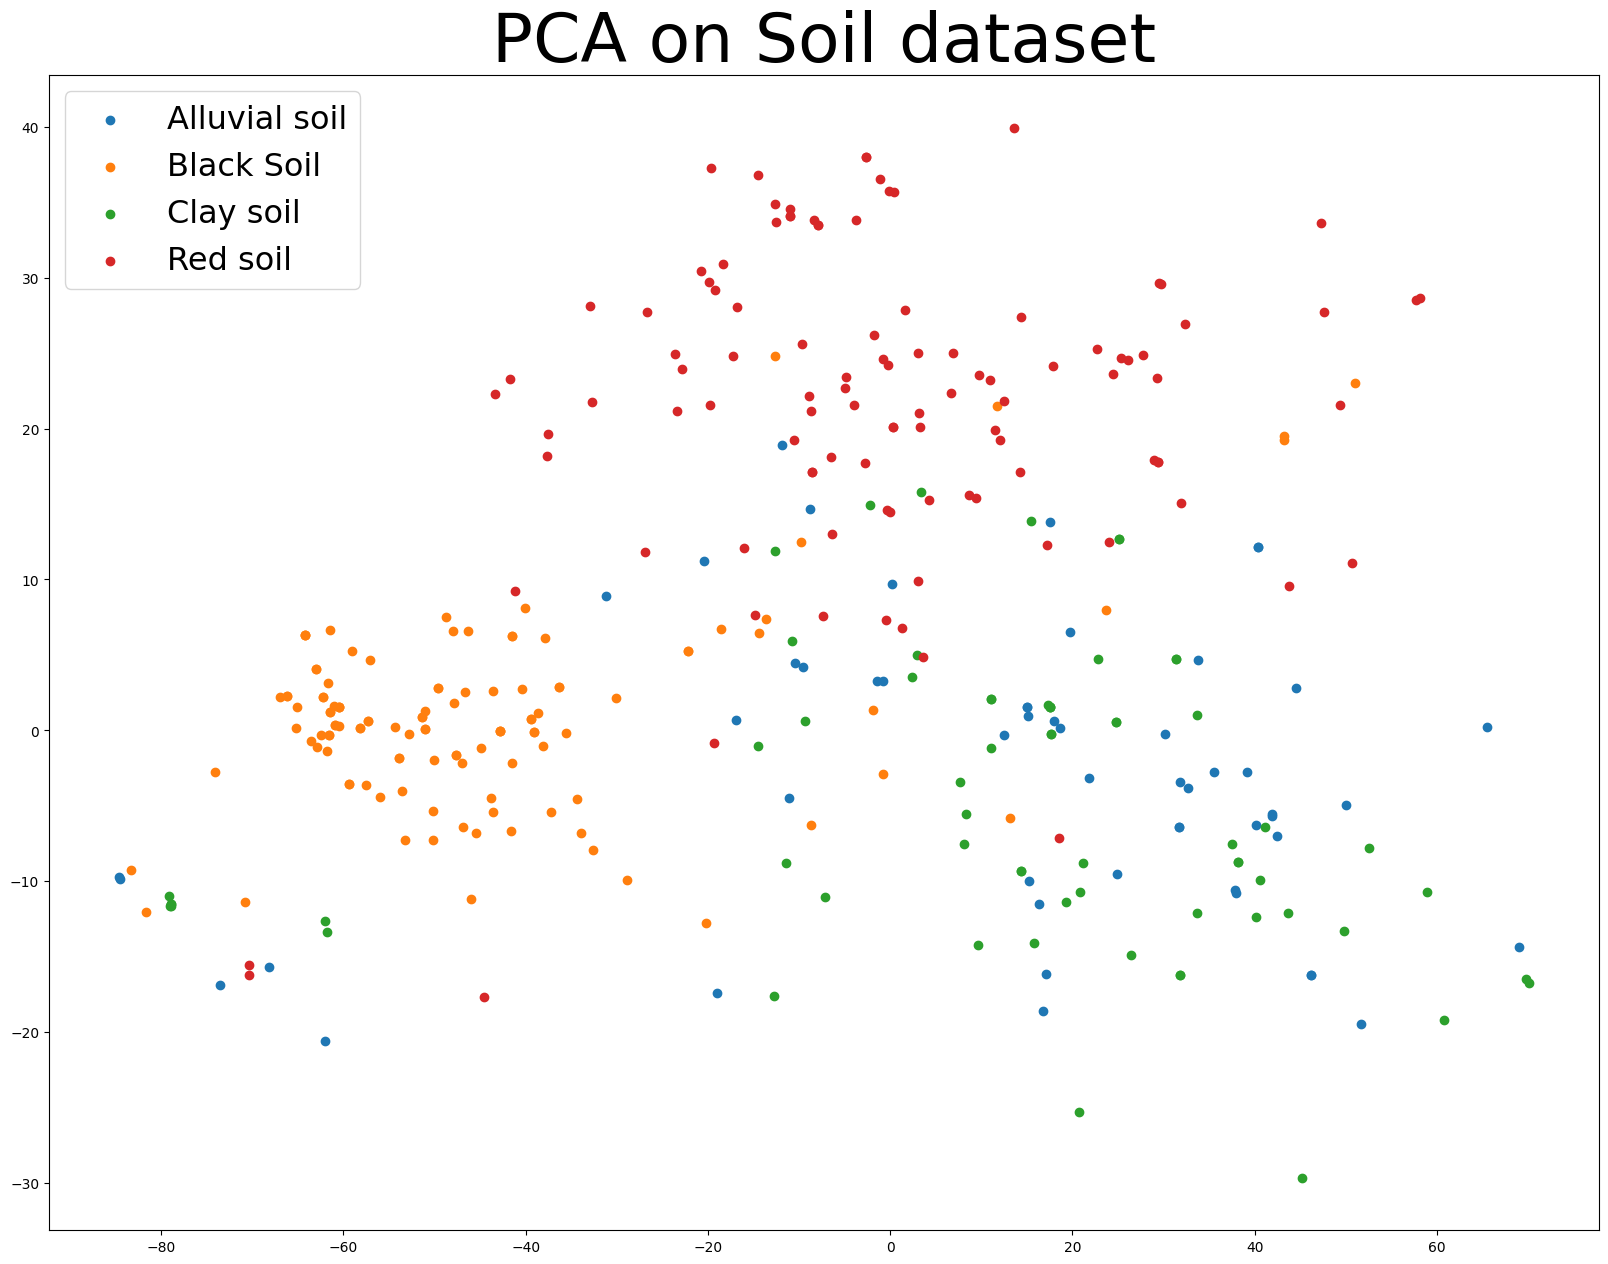

In [11]:
plt.figure(figsize=(20,15))
for  i, target_name in zip([ 0, 1, 2, 3, 4, 5, 6, 7], image_dataset.target_names):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test== i, 1], label=target_name)
plt.legend(fontsize=23)
plt.title('PCA on Soil dataset', fontsize =49)

plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
import time

# Start timing
start_time = time.time()
clf_rf = RandomForestClassifier(class_weight='balanced',max_depth= 9, min_samples_leaf= 3, min_samples_split= 2, random_state=42)

clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
f1_rf = metrics.f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = metrics.precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = metrics.recall_score(y_test, y_pred_rf, average='weighted')
print(metrics.classification_report(y_test, y_pred_rf, target_names=image_dataset.target_names))
print("Accuracy", round(accuracy_rf*100,2))

print("F1-score ",round(f1_rf*100,2))
print("Precision ",round(precision_rf*100,2))
print("Recall",round(recall_rf*100,2))

accuracy.append(round(accuracy_rf*100,2))
f1_score.append(round(f1_rf*100,2))


end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

               precision    recall  f1-score   support

Alluvial soil       1.00      0.98      0.99        54
   Black Soil       0.99      1.00      1.00       116
    Clay soil       1.00      1.00      1.00        65
     Red soil       1.00      1.00      1.00       106

     accuracy                           1.00       341
    macro avg       1.00      1.00      1.00       341
 weighted avg       1.00      1.00      1.00       341

Accuracy 99.71
F1-score  99.71
Precision  99.71
Recall 99.71
Elapsed Time: 1.69 seconds


In [10]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
clf_dt = DecisionTreeClassifier(class_weight='balanced',max_depth =9, min_samples_leaf=1, min_samples_split= 2, random_state=42)

clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
f1_dt = metrics.f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = metrics.precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = metrics.recall_score(y_test, y_pred_dt, average='weighted')
print(metrics.classification_report(y_test, y_pred_dt, target_names=image_dataset.target_names))
print("Accuracy", round(accuracy_dt*100,2))

print("F1-score ",round(f1_dt*100,2))
print("Precision ",round(precision_dt*100,2))
print("Recall",round(recall_dt*100,2))

accuracy.append(round(accuracy_dt*100,2))
f1_score.append(round(f1_dt*100,2))

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

               precision    recall  f1-score   support

         Mary       0.68      0.44      0.53       172
        Black       0.61      0.65      0.63       210
Alluvial soil       0.86      0.73      0.79       316
         Sand       0.38      0.26      0.31       170
     Red soil       0.90      0.84      0.87       222
       Chalky       0.35      0.46      0.40       166
    Clay soil       0.60      0.52      0.56       160
         Silt       0.33      0.59      0.42       168

     accuracy                           0.59      1584
    macro avg       0.59      0.56      0.56      1584
 weighted avg       0.63      0.59      0.60      1584

Accuracy 58.84
F1-score  59.66
Precision  62.55
Recall 58.84
Elapsed Time: 0.67 seconds


In [13]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(X_train,y_train)

kn_pred = kn.predict(X_test)
print("----------------------------------")
print(metrics.classification_report(y_pred=kn_pred,y_true=y_test, target_names=image_dataset.target_names))
print("----------------------------------")
print("Accuracy = ", round(metrics.accuracy_score(kn_pred, y_test) *100,2))
print("----------------------------------")
print("F1-score = ", round(metrics.f1_score(kn_pred,y_test, average='weighted') * 100,2))

accuracy.append(round(metrics.accuracy_score(kn_pred, y_test) *100,2))
f1_score.append( round(metrics.f1_score(kn_pred,y_test, average='weighted') * 100,2))
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

----------------------------------
               precision    recall  f1-score   support

Alluvial soil       0.55      0.91      0.69        54
   Black Soil       0.95      0.92      0.93       116
    Clay soil       1.00      0.34      0.51        65
     Red soil       0.88      0.97      0.92       106

     accuracy                           0.82       341
    macro avg       0.84      0.78      0.76       341
 weighted avg       0.87      0.82      0.81       341

----------------------------------
Accuracy =  82.4
----------------------------------
F1-score =  83.81
Elapsed Time: 0.68 seconds


In [14]:
svm = SVC(class_weight='balanced', C=10,gamma='scale', kernel='linear', random_state=42) 
start_time = time.time()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=image_dataset.target_names))
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
f1_svm = metrics.f1_score(y_test, y_pred, average='weighted')
precision_svm = metrics.precision_score(y_test, y_pred, average='weighted')
recall_svm = metrics.recall_score(y_test, y_pred, average='weighted')
print("Accuracy", accuracy_svm)
accuracy.append(accuracy_svm*100)
f1_score.append(f1_svm*100)
precision_score.append(precision_svm*100)
recall_score.append(recall_svm*100)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

accuracy.append(round(metrics.accuracy_score(y_test, y_pred) *100,2))
f1_score.append( round(metrics.f1_score(y_test, y_pred, average='weighted') * 100,2))

               precision    recall  f1-score   support

Alluvial soil       1.00      1.00      1.00        54
   Black Soil       1.00      1.00      1.00       116
    Clay soil       1.00      1.00      1.00        65
     Red soil       1.00      1.00      1.00       106

     accuracy                           1.00       341
    macro avg       1.00      1.00      1.00       341
 weighted avg       1.00      1.00      1.00       341

Accuracy 1.0
Elapsed Time: 0.18 seconds


[Text(0, 0.5, 'Alluvial soil'),
 Text(0, 1.5, 'Black Soil'),
 Text(0, 2.5, 'Clay soil'),
 Text(0, 3.5, 'Red soil')]

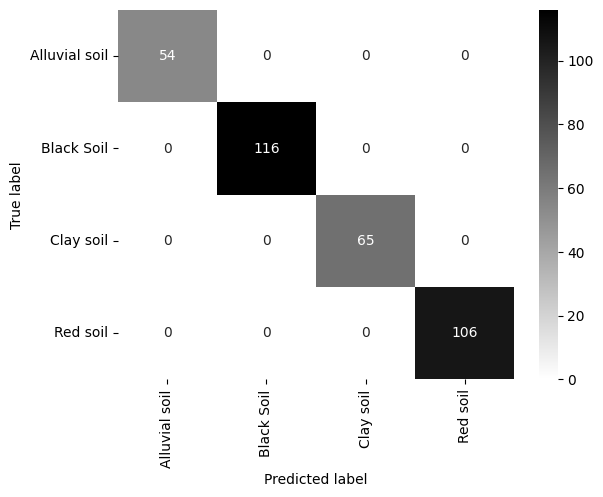

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt    


from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='binary')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(image_dataset.target_names, rotation='vertical')
ax.yaxis.set_ticklabels(image_dataset.target_names, rotation='horizontal')

In [16]:
X_train= image_dataset.images
X_test= image_dataset_test.images
y_train= image_dataset.target
y_test=image_dataset_test.target

print(X_train.shape)
print(X_test.shape) 

(1222, 128, 128, 3)
(341, 128, 128, 3)


In [23]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('G:\soil classsification\optimal_cnn.h5')

c:\Users\Soumaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Soumaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [24]:
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=10,
                                        restore_best_weights=True)

In [26]:
history=loaded_model.fit(X_train,y_train,batch_size=8,epochs=5, validation_data=(X_test,y_test),verbose=1,callbacks=[earlystopping])

Epoch 1/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 533ms/step - accuracy: 0.6449 - loss: 1.8409 - val_accuracy: 0.8798 - val_loss: 0.4176
Epoch 2/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 90s 588ms/step - accuracy: 0.8597 - loss: 0.4971 - val_accuracy: 0.9355 - val_loss: 0.2588
Epoch 3/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 77s 501ms/step - accuracy: 0.9061 - loss: 0.3258 - val_accuracy: 0.9531 - val_loss: 0.1959
Epoch 4/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 72s 468ms/step - accuracy: 0.9497 - loss: 0.2021 - val_accuracy: 0.9707 - val_loss: 0.1415
Epoch 5/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 72s 468ms/step - accuracy: 0.9650 - loss: 0.1474 - val_accuracy: 0.9677 - val_loss: 0.1491


In [27]:
y_pred = loaded_model.predict(X_test)
# Get the class predictions (indices of the highest probability) from y_pred
y_pred = np.argmax(y_pred, axis=1)

print(metrics.classification_report(y_test, y_pred, target_names=image_dataset.target_names))
accuracy_cnn = metrics.accuracy_score(y_test, y_pred)
f1_cnn = metrics.f1_score(y_test, y_pred, average='weighted')
precision_cnn = metrics.precision_score(y_test, y_pred, average='weighted')
recall_cnn = metrics.recall_score(y_test, y_pred, average='weighted')
print("Accuracy", accuracy_cnn * 100)
print("F1-Score", f1_cnn * 100)
accuracy.append(accuracy_cnn * 100)
f1_score.append(f1_cnn * 100)
precision_score.append(precision_cnn * 100)
recall_score.append(recall_cnn * 100)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step
               precision    recall  f1-score   support

Alluvial soil       0.96      0.85      0.90        54
   Black Soil       1.00      1.00      1.00       116
    Clay soil       0.89      0.97      0.93        65
     Red soil       1.00      1.00      1.00       106

     accuracy                           0.97       341
    macro avg       0.96      0.96      0.96       341
 weighted avg       0.97      0.97      0.97       341

Accuracy 97.0674486803519
F1-Score 97.04588580300154


[Text(0, 0.5, 'Alluvial soil'),
 Text(0, 1.5, 'Black Soil'),
 Text(0, 2.5, 'Clay soil'),
 Text(0, 3.5, 'Red soil')]

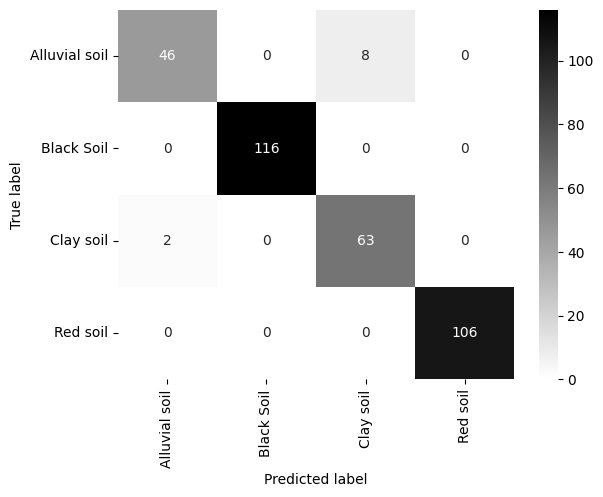

In [28]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='binary')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(image_dataset.target_names, rotation='vertical')
ax.yaxis.set_ticklabels(image_dataset.target_names, rotation='horizontal')

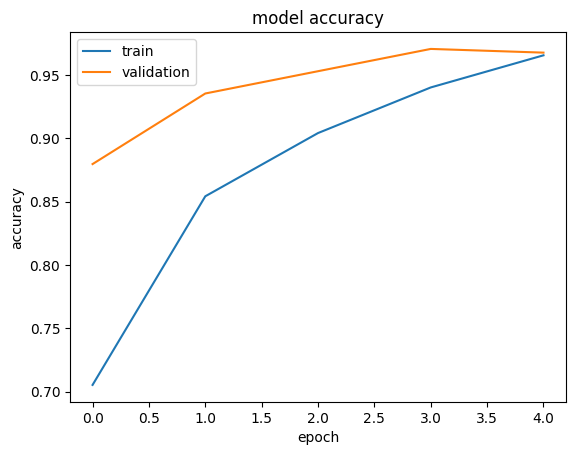

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

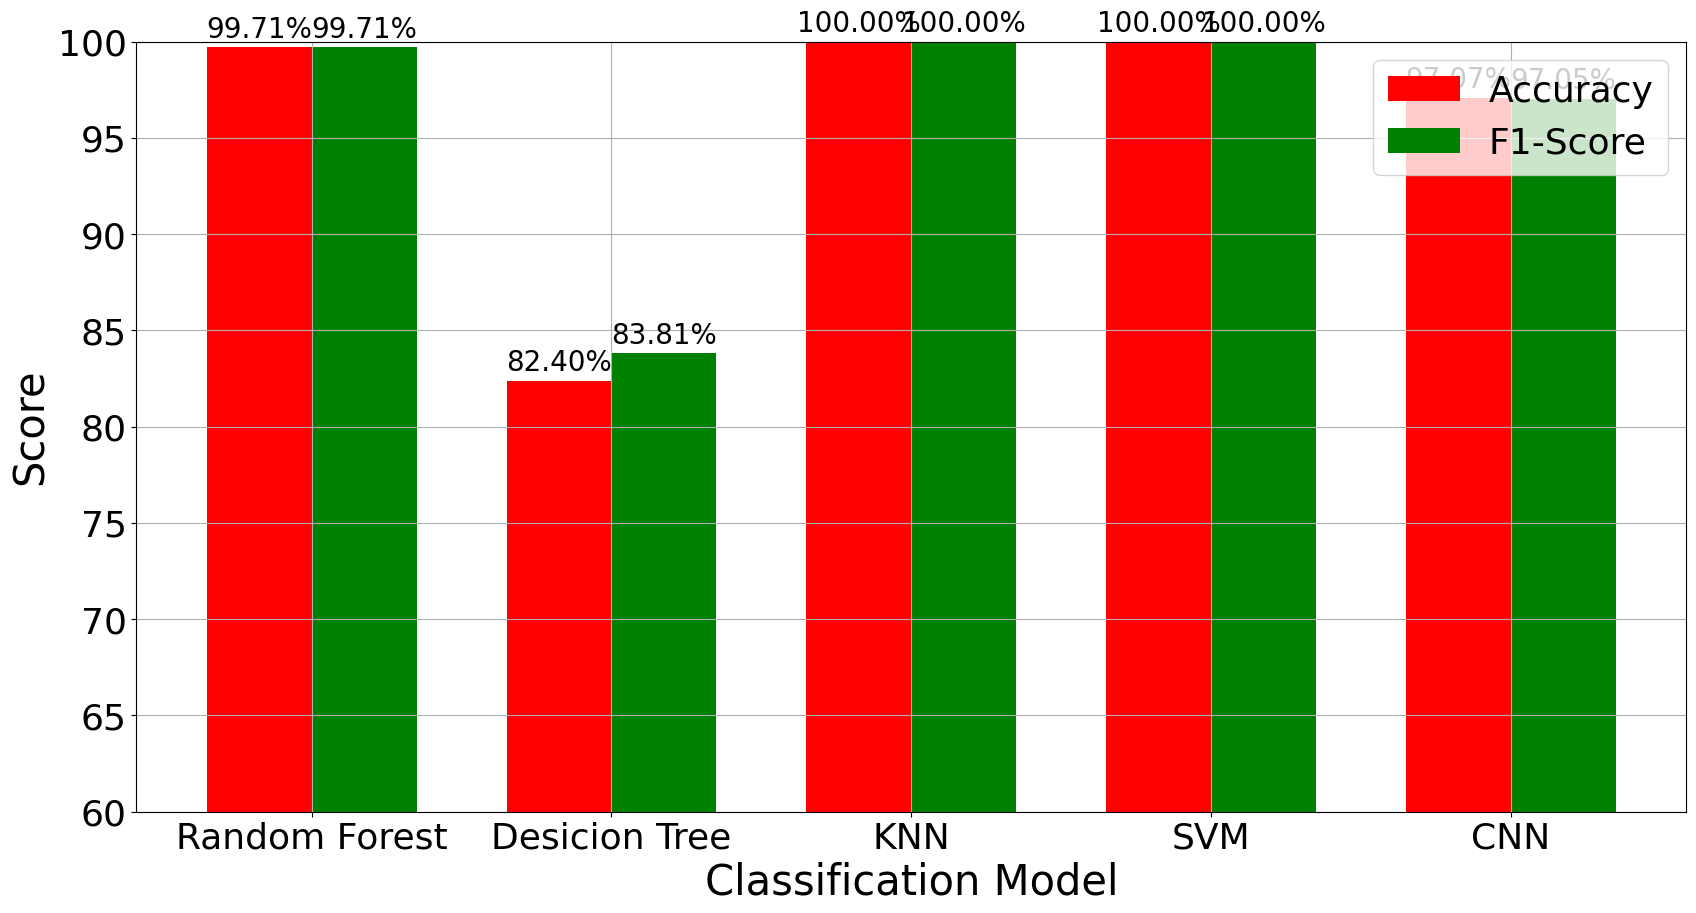

In [ ]:
key = ['Accuracy', 'F1-Score']
labels = ['Random Forest','Desicion Tree','KNN','SVM','CNN']
bar_width = 0.35
index = range(len(labels))

fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(index, accuracy ,bar_width, label='Accuracy', color='red')
bar2 = ax.bar([i + bar_width for i in index], f1_score, bar_width, label='F1-Score', color='green')

# Display percentage values on top of the bars
for bar in [bar1,bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

plt.ylabel("Score", fontsize=30)
plt.xlabel("Classification Model", fontsize=30)
plt.legend(key, fontsize=26)
# plt.title("Experiment 3: Accuracy and F1 Scores", fontsize=34)
plt.ylim((60,100))
plt.tick_params(labelsize=26)
plt.grid()
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.show()